<a href="https://colab.research.google.com/github/carlos-gutier/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# URL for data source
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [75]:
# Loading data & adding informative variable names
cols = ['age', 'year_surgery', 'nodes_found', 'survival']
df = pd.read_csv(data_url, header=None, names=cols)

df.head(10)

,age,year_surgery,nodes_found,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [76]:
# Validating number of observations
# According to source 'Number of Instances: 306' & 4 variables
df.shape

(306, 4)

In [77]:
# Validating absence of missing values
df.isna().sum().sum()

0

In [78]:
# Changing encoding of 'survival' variable
# 0 for not surviving and 1 for surviving > 5 years
df = pd.get_dummies(df, columns=['survival'])
df = df.rename(columns={'survival_1': 'survived', 'survival_2': 'not_survived'})

df.head(10)

,age,year_surgery,nodes_found,survived,not_survived
0,30,64,1,1,0
1,30,62,3,1,0
2,30,65,0,1,0
3,31,59,2,1,0
4,31,65,4,1,0
5,33,58,10,1,0
6,33,60,0,1,0
7,34,59,0,0,1
8,34,66,9,0,1
9,34,58,30,1,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [79]:
# Displaying unique patient ages in set
df.age.unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [80]:
# Binning for 'age' variable
age_bins = pd.cut(df['age'], 4) # 4 equal sized bins
pd.crosstab(df['survived'], age_bins)

age,"(29.947, 43.25]","(43.25, 56.5]","(56.5, 69.75]","(69.75, 83.0]"
survived,,,,
0,13,40,22,6
1,60,84,66,15


In [81]:
# Displaying unique surgery years in data set
np.sort(df.year_surgery.unique())

array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [82]:
# Binning for 'year_surgery' variable
year_bins = pd.cut(df['year_surgery'], 4) # 4 equal sized bins
pd.crosstab(df['survived'], year_bins)

year_surgery,"(57.989, 60.75]","(60.75, 63.5]","(63.5, 66.25]","(66.25, 69.0]"
survived,,,,
0,25,18,27,11
1,66,61,60,38


In [83]:
# Displaying unique number of nodes in data set
np.sort(df.nodes_found.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30, 35, 46, 52])

In [84]:
# Binning for 'nodes_found' variable
nodes_bins = pd.cut(df['nodes_found'], 5) # 4 equal sized bins
pd.crosstab(df['survived'], nodes_bins)

nodes_found,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survived,,,,,
0,58,15,6,1,1
1,208,11,5,0,1


### Preferred Bins for Plotting

In [0]:
# For plotting we will rather used the following bins:
# Age bins
age_29_43 = df[(df['age'] >= 30) & (df['age'] < 43)]
age_43_55 = df[(df['age'] >= 43) & (df['age'] < 56)]
age_56_69 = df[(df['age'] >= 56) & (df['age'] < 70)]
age_70_83 = df[(df['age'] >= 70) & (df['age'] < 84)]

# Year of surgery bins
year_58_60 = df[(df['year_surgery'] >= 58) & (df['year_surgery'] < 61)]
year_61_63 = df[(df['year_surgery'] >= 61) & (df['year_surgery'] < 64)]
year_64_66 = df[(df['year_surgery'] >= 64) & (df['year_surgery'] < 67)]
year_67_69 = df[(df['year_surgery'] >= 67) & (df['year_surgery'] < 70)]

# Nodes found bins
nodes_0_3 = df[(df['nodes_found'] >= 0) & (df['nodes_found'] < 4)]
nodes_4_7 = df[(df['nodes_found'] >= 4) & (df['nodes_found'] < 8)]
nodes_8_13 = df[(df['nodes_found'] >= 8) & (df['nodes_found'] < 14)]
nodes_14_25 = df[(df['nodes_found'] >= 14) & (df['nodes_found'] < 26)]
nodes_26_52 = df[(df['nodes_found'] >= 26) & (df['nodes_found'] < 53)]

### Graph of Survival by Patient's Age

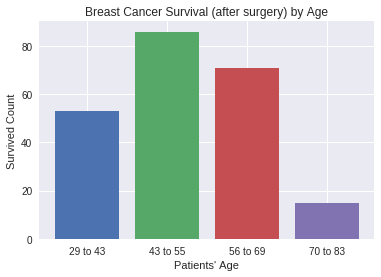

In [98]:
# Bar plot by age groups
plt.bar(x='29 to 43', height=age_29_43['survived'].sum())
plt.bar(x='43 to 55', height=age_43_55['survived'].sum())
plt.bar(x='56 to 69', height=age_56_69['survived'].sum())
plt.bar(x='70 to 83', height=age_70_83['survived'].sum())

plt.title('Breast Cancer Survival (after surgery) by Age')
plt.xlabel("Patients' Age")
plt.ylabel("Survived Count")

plt.show();

### Graph of Survival by Number of Positive Nodes Found

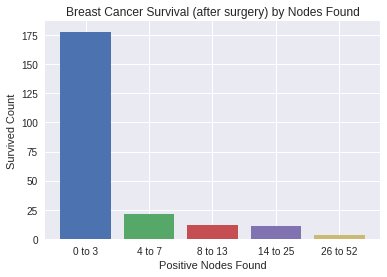

In [100]:
# Bar plot by number of positive nodes found
plt.bar(x='0 to 3', height=nodes_0_3['survived'].sum())
plt.bar(x='4 to 7', height=nodes_4_7['survived'].sum())
plt.bar(x='8 to 13', height=nodes_8_13['survived'].sum())
plt.bar(x='14 to 25', height=nodes_14_25['survived'].sum())
plt.bar(x='26 to 52', height=nodes_26_52['survived'].sum())

plt.title('Breast Cancer Survival (after surgery) by Nodes Found')
plt.xlabel("Positive Nodes Found")
plt.ylabel("Survived Count")

plt.show();

### Graph of Survival by Year of Surgery

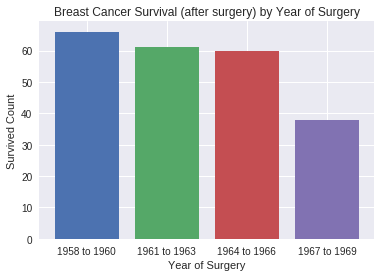

In [99]:
# Bar plot by year of surgery
plt.bar(x='1958 to 1960', height=year_58_60['survived'].sum())
plt.bar(x='1961 to 1963', height=year_61_63['survived'].sum())
plt.bar(x='1964 to 1966', height=year_64_66['survived'].sum())
plt.bar(x='1967 to 1969', height=year_67_69['survived'].sum())

plt.title('Breast Cancer Survival (after surgery) by Year of Surgery')
plt.xlabel("Year of Surgery")
plt.ylabel("Survived Count")

plt.show();

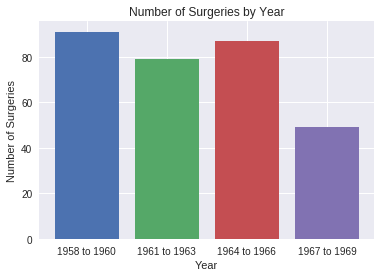

In [112]:
# Bar plot of number of surgeries by year
plt.bar(x='1958 to 1960', height=year_58_60['age'].count())
plt.bar(x='1961 to 1963', height=year_61_63['age'].count())
plt.bar(x='1964 to 1966', height=year_64_66['age'].count())
plt.bar(x='1967 to 1969', height=year_67_69['age'].count())

plt.title('Number of Surgeries by Year')
plt.xlabel("Year")
plt.ylabel("Number of Surgeries")

plt.show();

### Graph of Average Number of Positive Nodes Found by Year of Surgery

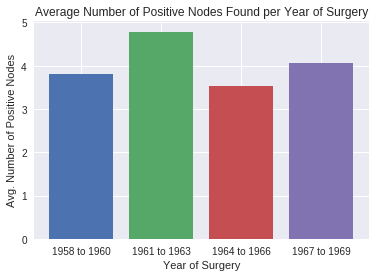

In [110]:
# Bar plot of number of positive nodes found yearly
plt.bar(x='1958 to 1960', height=year_58_60['nodes_found'].mean())
plt.bar(x='1961 to 1963', height=year_61_63['nodes_found'].mean())
plt.bar(x='1964 to 1966', height=year_64_66['nodes_found'].mean())
plt.bar(x='1967 to 1969', height=year_67_69['nodes_found'].mean())

plt.title('Average Number of Positive Nodes Found per Year of Surgery')
plt.xlabel("Year of Surgery")
plt.ylabel("Avg. Number of Positive Nodes")

plt.show();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
> The feature that seems to have somewhat of a positive correlation is the  **patients' age**. As the years increase, the survival rate decreases. 
- What is at least one feature that looks to have a negative correlation with survival?
> The feature that seems to have the strongest negative correlation is the number of **nodes found**. As the number of nodes found increase, the survival rate decreases. The other is the **year of surgery**. As the years increase, patients' survival rate decreases.
- How are those two features related with each other, and what might that mean?
> As far as their relationship with survival, it seems understandable that the rate of survival would be greater for those with lower number of positive nodes found (one would definitely think that those patients' health has been less afected by cancer). Meanwhile, one could think that as time goes by the rate of women found to have breast cancer could have increased as well thus decreasing the chance of survival.
> Moreover, when it comes to finding their relationship to each other it may all point to the above mentioned. Average number of nodes seems to be about the same per year and number of surgery decreased, yet survival rates decreased as well.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.